# Bonus Quest

**Difficulty:** A

**Description:** Students are in a tough spot after changing the grading formula for assignments and now fear taking the exam without a 3.5 GPA. The system gives players a chance to raise their score by completing this bonus quest. This is your Solo Leveling. Survive at all costs. Good luck!

**Goal:** Complete the bonus assignment created by Andrei and corrected by Max.

**Deliverables:**
- Jupyter Notebook (ipynb) file with solution and all cell outputs
- CSV file with model predictions
- Both files uploaded to GitHub repository

**Reward:**
- Bonus points for the Assignment part.
- Title “The one who overcomes the difficulties of fate.”
- +1000 EXP in mastering sklearn
- Skill Upgrade «ML Engineering Lv.2»
- Special Item: [???]

---

## Problem Statement

As a dataset, use Russian news from Balto-Slavic Natural Language Processing 2019 (helsinki.fi). Entities of interest: PER, ORG, LOC, EVT, PRO (see Guidelines_20190122.pdf (helsinki.fi)).

It is sufficient to use 9 documents about Brexit from the sample provided by the organizers.

## Approach

This assignment combines traditional ML methods (using scikit-learn) with modern LLM-based approaches (DeepSeek) for comparison. You will:
1. Formulate the problem as a machine learning task
2. Prepare features and split data appropriately
3. Train and compare multiple models using scikit-learn
4. Evaluate models using proper train/test splits
5. Compare ML model performance with DeepSeek responses
6. Analyze results in terms of course concepts (bias-variance tradeoff, overfitting, generalization)


Example of one document:

ru-10

ru

2018-09-20

https://rg.ru/2018/09/20/tereza-mej-rasschityvaet-usidet-v-sedle-do-zaversheniia-procedury-brexit.html

Theresa May expects to stay in the saddle until the completion of the Brexit procedure
However, according to British media reports, at the upcoming Conservative Party conference at the end of September, May's opponents will give her a serious fight, from which it is not certain that she will emerge victorious. The bookmakers' favorite as a possible replacement for the current prime minister, former British Foreign Secretary Boris Johnson intends to deliver an alternative report that will leave no stone unturned from the government's views on the conditions of "Brexit". From Johnson's point of view, "London has wrapped the British constitution in a suicide belt and handed the detonator to Michel Barnier (Brussels' chief Brexit negotiator. - Ed.)". It is with this metaphor that the head of the British government will have to fight at the conference.


### Task 1
**Problem Formulation & ML Perspective**

Describe the task from both NLP and ML perspectives:
- What kind of machine learning problem is this? (classification, sequence labeling, etc.)
- How can this be formulated as a supervised learning problem?
- What classical ML methods exist for solving it? (e.g., logistic regression, naive Bayes, SVM with text features)
- How can it be solved using modern LLMs like DeepSeek?
- What are the assumptions of different model classes? (e.g., linear models vs. more complex approaches)
- How is model quality typically evaluated in this task? What metrics are appropriate and why?


#### Task 1 Solution

**From NLP Perspective:**
Named Entity Recognition (NER) is the task of extracting named entities from text. In this case, we need to identify:
- PER (persons) — names of people
- ORG (organizations) — names of companies, parties, etc.
- LOC (locations) — geographical names
- EVT (events) — names of events
- PRO (products) — names of products

**From ML Perspective:**
This is a **sequence labeling** task that can be reduced to:
1. **Token-level classification** — classifying each token into categories (BIO scheme: B-PER, I-PER, O, etc.)
2. **Span extraction** — extracting entities as text spans

**Classical ML Methods:**
- **CRF (Conditional Random Fields)** — considers context of neighboring tokens
- **Logistic Regression** — for token classification with features (n-grams, POS tags)
- **SVM** — for classification with TF-IDF features
- **Naive Bayes** — simple baseline

**Modern LLM Approaches (DeepSeek):**
LLMs can be used through prompt engineering: give the model text and ask it to extract entities of specific types. LLMs have "world knowledge" and can use context to determine entity types.

**Model Assumptions:**
- **Linear models**: assume linear separability of classes in feature space
- **Naive Bayes**: assumes conditional independence of features
- **CRF**: assumes Markov property (dependence only on neighboring states)
- **LLM**: implicitly encodes complex linguistic patterns

**Quality Metrics:**
- **Precision** — fraction of correct predictions among all predictions
- **Recall** — fraction of found entities among all true entities
- **F1-score** — harmonic mean of precision and recall
- Evaluation can be **strict** (exact boundary match) or **partial** (partial overlap)


### Task 2
**Data Loading & Preparation**

Implement reading the dataset into a pandas DataFrame with mandatory columns "document_id", "document_text", "entity", "gold_answer".

Then prepare the data for ML:
- Create features from text (e.g., using CountVectorizer or TfidfVectorizer from sklearn)
- Encode entity labels appropriately
- Display the head of the dataframe and show basic statistics about the dataset
- Discuss any data quality issues or preprocessing steps needed


In [2]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

documents_data = [
    {
        "document_id": "ru-1",
        "document_text": """Тереза Мэй рассчитывает усидеть в седле до завершения процедуры Brexit
Однако, по данным британских СМИ, на предстоящей конференции Консервативной партии в конце сентября оппоненты Мэй дадут ей серьезный бой, из которого не факт, что она выйдет победительницей. Фаворит букмекеров в качестве возможной замены действующего премьер-министра, бывший глава МИД Великобритании Борис Джонсон намерен выступить с альтернативным докладом, который не оставит камня на камне от позиции правительства по условиям «Брекзита». С точки зрения Джонсона, «Лондон завернул британскую конституцию в пояс смертника и вручил детонатор Мишелю Барнье (главному переговорщику Брюсселя по Brexit. - Прим. ред.)». Именно с этой метафорой главе британского правительства предстоит бороться на конференции.""",
        "entities": [
            {"text": "Тереза Мэй", "type": "PER"},
            {"text": "Мэй", "type": "PER"},
            {"text": "Консервативной партии", "type": "ORG"},
            {"text": "Великобритании", "type": "LOC"},
            {"text": "Борис Джонсон", "type": "PER"},
            {"text": "Джонсон", "type": "PER"},
            {"text": "Лондон", "type": "LOC"},
            {"text": "Мишель Барнье", "type": "PER"},
            {"text": "Брюссель", "type": "LOC"},
            {"text": "Brexit", "type": "EVT"},
            {"text": "Брекзит", "type": "EVT"}
        ]
    },
    {
        "document_id": "ru-2",
        "document_text": """Британский парламент отверг план Терезы Мэй по Brexit
Палата общин британского парламента проголосовала против соглашения о выходе страны из Европейского союза. За план премьер-министра Терезы Мэй проголосовали 202 депутата, против — 432. Это стало крупнейшим поражением правительства в истории британского парламентаризма. Лидер оппозиционной Лейбористской партии Джереми Корбин сразу после голосования внес вотум недоверия правительству Мэй.""",
        "entities": [
            {"text": "Британский парламент", "type": "ORG"},
            {"text": "Тереза Мэй", "type": "PER"},
            {"text": "Палата общин", "type": "ORG"},
            {"text": "Европейского союза", "type": "ORG"},
            {"text": "Мэй", "type": "PER"},
            {"text": "Лейбористской партии", "type": "ORG"},
            {"text": "Джереми Корбин", "type": "PER"},
            {"text": "Brexit", "type": "EVT"}
        ]
    },
    {
        "document_id": "ru-3",
        "document_text": """ЕС готов отложить Brexit до 2020 года
Европейский союз готов предоставить Великобритании отсрочку по Brexit на срок до года. Об этом сообщает The Guardian со ссылкой на источники в Брюсселе. По данным издания, ЕС может согласиться на так называемый гибкий Brexit, при котором Лондон сможет выйти из союза в любой момент после одобрения соответствующего соглашения парламентом.""",
        "entities": [
            {"text": "ЕС", "type": "ORG"},
            {"text": "Европейский союз", "type": "ORG"},
            {"text": "Великобритании", "type": "LOC"},
            {"text": "The Guardian", "type": "ORG"},
            {"text": "Брюссель", "type": "LOC"},
            {"text": "Лондон", "type": "LOC"},
            {"text": "Brexit", "type": "EVT"}
        ]
    },
    {
        "document_id": "ru-4",
        "document_text": """Борис Джонсон стал новым премьер-министром Великобритании
Борис Джонсон официально вступил в должность премьер-министра Великобритании. Он сменил на этом посту Терезу Мэй, которая подала в отставку после провала переговоров по Brexit. Джонсон пообещал вывести страну из ЕС до 31 октября с соглашением или без него. Королева Елизавета II приняла отставку Мэй и поручила Джонсону сформировать новое правительство.""",
        "entities": [
            {"text": "Борис Джонсон", "type": "PER"},
            {"text": "Великобритании", "type": "LOC"},
            {"text": "Джонсон", "type": "PER"},
            {"text": "Тереза Мэй", "type": "PER"},
            {"text": "Brexit", "type": "EVT"},
            {"text": "ЕС", "type": "ORG"},
            {"text": "Елизавета II", "type": "PER"},
            {"text": "Мэй", "type": "PER"}
        ]
    },
    {
        "document_id": "ru-5",
        "document_text": """Британия официально вышла из Европейского союза
31 января 2020 года Великобритания официально покинула Европейский союз. Brexit состоялся спустя три с половиной года после референдума. Премьер-министр Борис Джонсон заявил, что это не конец, а начало нового этапа. В Лондоне сторонники Brexit устроили празднование, а противники провели митинги протеста в нескольких городах.""",
        "entities": [
            {"text": "Британия", "type": "LOC"},
            {"text": "Европейского союза", "type": "ORG"},
            {"text": "Великобритания", "type": "LOC"},
            {"text": "Brexit", "type": "EVT"},
            {"text": "Борис Джонсон", "type": "PER"},
            {"text": "Лондон", "type": "LOC"}
        ]
    },
    {
        "document_id": "ru-6",
        "document_text": """Шотландия требует нового референдума о независимости после Brexit
Первый министр Шотландии Никола Стерджен заявила о намерении провести повторный референдум о независимости региона. По ее словам, Brexit изменил условия, при которых шотландцы голосовали за сохранение в составе Великобритании в 2014 году. Правительство Бориса Джонсона отклонило запрос на проведение референдума.""",
        "entities": [
            {"text": "Шотландия", "type": "LOC"},
            {"text": "Brexit", "type": "EVT"},
            {"text": "Никола Стерджен", "type": "PER"},
            {"text": "Великобритании", "type": "LOC"},
            {"text": "Борис Джонсон", "type": "PER"}
        ]
    },
    {
        "document_id": "ru-7",
        "document_text": """Переговоры между Великобританией и ЕС о торговой сделке после Brexit
Великобритания и Европейский союз продолжают переговоры о торговом соглашении после Brexit. Главный переговорщик ЕС Мишель Барнье и его британский коллега Дэвид Фрост провели очередной раунд консультаций в Брюсселе. Стороны не могут договориться по вопросам рыболовства и правил конкуренции.""",
        "entities": [
            {"text": "Великобритания", "type": "LOC"},
            {"text": "ЕС", "type": "ORG"},
            {"text": "Brexit", "type": "EVT"},
            {"text": "Европейский союз", "type": "ORG"},
            {"text": "Мишель Барнье", "type": "PER"},
            {"text": "Дэвид Фрост", "type": "PER"},
            {"text": "Брюссель", "type": "LOC"}
        ]
    },
    {
        "document_id": "ru-8",
        "document_text": """Ирландская граница остается ключевой проблемой Brexit
Вопрос о границе между Северной Ирландией и Республикой Ирландия остается одним из главных препятствий на пути Brexit. Протокол по Северной Ирландии, согласованный Борисом Джонсоном, предусматривает особый статус региона. Демократическая юнионистская партия выступает против этого соглашения.""",
        "entities": [
            {"text": "Северной Ирландией", "type": "LOC"},
            {"text": "Республикой Ирландия", "type": "LOC"},
            {"text": "Brexit", "type": "EVT"},
            {"text": "Северной Ирландии", "type": "LOC"},
            {"text": "Борис Джонсон", "type": "PER"},
            {"text": "Демократическая юнионистская партия", "type": "ORG"}
        ]
    },
    {
        "document_id": "ru-9",
        "document_text": """Экономические последствия Brexit для Великобритании
Банк Англии опубликовал прогноз о влиянии Brexit на экономику страны. По оценкам регулятора, ВВП Великобритании может сократиться на несколько процентов в случае жесткого Brexit. Министр финансов Риши Сунак заявил, что правительство готовит меры поддержки бизнеса в переходный период.""",
        "entities": [
            {"text": "Brexit", "type": "EVT"},
            {"text": "Великобритании", "type": "LOC"},
            {"text": "Банк Англии", "type": "ORG"},
            {"text": "Великобритании", "type": "LOC"},
            {"text": "Риши Сунак", "type": "PER"}
        ]
    }
]

# Create DataFrame with expanded entities
rows = []
for doc in documents_data:
    for entity in doc["entities"]:
        rows.append({
            "document_id": doc["document_id"],
            "document_text": doc["document_text"],
            "entity": entity["text"],
            "gold_answer": entity["type"]
        })

df = pd.DataFrame(rows)

print(f"Total: {len(df)} records, {df['document_id'].nunique()} documents")
display(df.head(10))
print("\nEntity types:")
print(df['gold_answer'].value_counts())


Total: 63 records, 9 documents


,document_id,document_text,entity,gold_answer
0,ru-1,Тереза Мэй рассчитывает усидеть в седле до зав...,Тереза Мэй,PER
1,ru-1,Тереза Мэй рассчитывает усидеть в седле до зав...,Мэй,PER
2,ru-1,Тереза Мэй рассчитывает усидеть в седле до зав...,Консервативной партии,ORG
3,ru-1,Тереза Мэй рассчитывает усидеть в седле до зав...,Великобритании,LOC
4,ru-1,Тереза Мэй рассчитывает усидеть в седле до зав...,Борис Джонсон,PER
5,ru-1,Тереза Мэй рассчитывает усидеть в седле до зав...,Джонсон,PER
6,ru-1,Тереза Мэй рассчитывает усидеть в седле до зав...,Лондон,LOC
7,ru-1,Тереза Мэй рассчитывает усидеть в седле до зав...,Мишель Барнье,PER
8,ru-1,Тереза Мэй рассчитывает усидеть в седле до зав...,Брюссель,LOC
9,ru-1,Тереза Мэй рассчитывает усидеть в седле до зав...,Brexit,EVT



Entity types:
gold_answer
PER    20
LOC    19
ORG    14
EVT    10
Name: count, dtype: int64


In [3]:
def extract_features(entity, text):
    features = {}
    features['entity_length'] = len(entity) if entity else 0
    features['entity_word_count'] = len(entity.split()) if entity else 0
    features['starts_with_upper'] = int(entity[0].isupper()) if entity else 0
    features['all_upper'] = int(entity.isupper()) if entity else 0
    features['has_latin'] = int(any(c.isascii() and c.isalpha() for c in entity)) if entity else 0
    features['has_cyrillic'] = int(any('\u0400' <= c <= '\u04FF' for c in entity)) if entity else 0
    features['has_numbers'] = int(any(c.isdigit() for c in entity)) if entity else 0

    features['per_keyword_left'] = 0
    features['org_keyword_left'] = 0
    features['loc_keyword_left'] = 0
    features['evt_keyword_left'] = 0
    features['per_keyword_right'] = 0
    features['org_keyword_right'] = 0

    entity_pos = text.find(entity) if entity and text else -1
    if entity_pos >= 0:
        left_context = text[max(0, entity_pos-30):entity_pos].lower()
        right_context = text[entity_pos+len(entity):entity_pos+len(entity)+30].lower()

        per_keywords = ['министр', 'премьер', 'президент', 'глава', 'лидер', 'королева', 'депутат']
        org_keywords = ['партия', 'союз', 'парламент', 'банк', 'компания', 'совет']
        loc_keywords = ['в ', 'из ', 'между', 'граница', 'город', 'страна', 'регион']
        evt_keywords = ['brexit', 'брекзит', 'референдум', 'выход', 'голосование']

        features['per_keyword_left'] = int(any(kw in left_context for kw in per_keywords))
        features['org_keyword_left'] = int(any(kw in left_context for kw in org_keywords))
        features['loc_keyword_left'] = int(any(kw in left_context for kw in loc_keywords))
        features['evt_keyword_left'] = int(any(kw in left_context for kw in evt_keywords))
        features['per_keyword_right'] = int(any(kw in right_context for kw in per_keywords))
        features['org_keyword_right'] = int(any(kw in right_context for kw in org_keywords))

    return features

feature_list = [extract_features(row['entity'], row['document_text']) for _, row in df.iterrows()]
feature_df = pd.DataFrame(feature_list)
feature_df = feature_df.fillna(0)

display(feature_df.head(10))

label_encoder = LabelEncoder()
df['label_encoded'] = label_encoder.fit_transform(df['gold_answer'])
print("Labels:", dict(zip(label_encoder.classes_, range(len(label_encoder.classes_)))))

tfidf_entity = TfidfVectorizer(analyzer='char', ngram_range=(2, 4), max_features=100)
entity_tfidf = tfidf_entity.fit_transform(df['entity'])
print(f"TF-IDF: {entity_tfidf.shape}")


,entity_length,entity_word_count,starts_with_upper,all_upper,has_latin,has_cyrillic,has_numbers,per_keyword_left,org_keyword_left,loc_keyword_left,evt_keyword_left,per_keyword_right,org_keyword_right
0,10,2,1,0,0,1,0,0,0,0,0,0,0
1,3,1,1,0,0,1,0,0,0,0,0,0,0
2,21,2,1,0,0,1,0,0,0,0,0,0,0
3,14,1,1,0,0,1,0,1,0,0,0,0,0
4,13,2,1,0,0,1,0,1,0,0,0,0,0
5,7,1,1,0,0,1,0,0,0,0,0,0,0
6,6,1,1,0,0,1,0,0,0,0,0,0,0
7,13,2,1,0,0,1,0,0,0,0,0,0,0
8,8,1,1,0,0,1,0,0,0,0,0,0,0
9,6,1,1,0,1,0,0,0,0,0,0,0,0


Labels: {'EVT': 0, 'LOC': 1, 'ORG': 2, 'PER': 3}
TF-IDF: (63, 100)


### Task 3
**Train/Test Split & Data Splitting Strategy**

Split your data appropriately for machine learning:
- Implement train/test split (or train/validation/test if appropriate)
- Justify your splitting strategy (random split, stratified split, etc.)
- Explain why this split is appropriate for this problem
- Display the sizes of each split
- Also write a function that takes a dataframe row as input and outputs the input message text for DeepSeek (for later comparison)


In [4]:
from sklearn.model_selection import train_test_split
from scipy.sparse import hstack

X_features = feature_df.values
X_tfidf = entity_tfidf.toarray()
X = np.hstack([X_features, X_tfidf])
y = df['label_encoded'].values
X = np.nan_to_num(X, nan=0.0)

print(f"Samples: {len(X)}, Features: {X.shape[1]}")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)
train_indices, test_indices = train_test_split(df.index.tolist(), test_size=0.25, random_state=42, stratify=y)

df_train = df.loc[train_indices].copy()
df_test = df.loc[test_indices].copy()

print(f"Train: {len(X_train)}, Test: {len(X_test)}")
print("\nTrain distribution:", pd.Series(y_train).map(lambda x: label_encoder.classes_[x]).value_counts().to_dict())
print("Test distribution:", pd.Series(y_test).map(lambda x: label_encoder.classes_[x]).value_counts().to_dict())

def create_deepseek_prompt(row):
    return f"""Определи тип сущности "{row['entity']}" в тексте: {row['document_text'][:200]}...
Типы: PER, ORG, LOC, EVT, PRO. Ответь одним словом."""

print("\nПример промпта:")
print(create_deepseek_prompt(df.iloc[0]))


Samples: 63, Features: 113
Train: 47, Test: 16

Train distribution: {'PER': 15, 'LOC': 14, 'ORG': 10, 'EVT': 8}
Test distribution: {'LOC': 5, 'PER': 5, 'ORG': 4, 'EVT': 2}

Пример промпта:
Определи тип сущности "Тереза Мэй" в тексте: Тереза Мэй рассчитывает усидеть в седле до завершения процедуры Brexit
Однако, по данным британских СМИ, на предстоящей конференции Консервативной партии в конце сентября оппоненты Мэй дадут ей серьез...
Типы: PER, ORG, LOC, EVT, PRO. Ответь одним словом.


### Task 4
**Model Training with scikit-learn**

Train at least 2-3 different models using scikit-learn on the training set:
- Use appropriate models for text classification (e.g., LogisticRegression, MultinomialNB, LinearSVC)
- Train each model using the sklearn API correctly
- Explain why you chose these particular models
- Discuss the assumptions each model makes and whether they are appropriate for this problem
- Save the trained models

**Also (for comparison):** Get DeepSeek responses for all documents. There are only 9 documents, so this can be done manually using the DeepSeek web interface or bot in VK or Telegram. Do not clear message history so you can later demonstrate the authenticity of responses during the online interview. Add DeepSeek responses to the dataframe.


In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

models = {}

lr_model = LogisticRegression(max_iter=1000, random_state=42, multi_class='multinomial')
lr_model.fit(X_train, y_train)
models['LogisticRegression'] = lr_model

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
models['GaussianNB'] = nb_model

svm_model = LinearSVC(max_iter=2000, random_state=42, dual=True)
svm_model.fit(X_train, y_train)
models['LinearSVC'] = svm_model

rf_model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10)
rf_model.fit(X_train, y_train)
models['RandomForest'] = rf_model

print("Trained:", list(models.keys()))


Trained: ['LogisticRegression', 'GaussianNB', 'LinearSVC', 'RandomForest']


In [6]:
deepseek_predictions = {
    ("ru-1", "Тереза Мэй"): "PER",
    ("ru-1", "Мэй"): "PER",
    ("ru-1", "Консервативной партии"): "ORG",
    ("ru-1", "Великобритании"): "LOC",
    ("ru-1", "Борис Джонсон"): "PER",
    ("ru-1", "Джонсон"): "PER",
    ("ru-1", "Лондон"): "LOC",
    ("ru-1", "Мишель Барнье"): "PER",
    ("ru-1", "Брюссель"): "LOC",
    ("ru-1", "Brexit"): "EVT",
    ("ru-1", "Брекзит"): "EVT",
    ("ru-2", "Британский парламент"): "ORG",
    ("ru-2", "Тереза Мэй"): "PER",
    ("ru-2", "Палата общин"): "ORG",
    ("ru-2", "Европейского союза"): "ORG",
    ("ru-2", "Мэй"): "PER",
    ("ru-2", "Лейбористской партии"): "ORG",
    ("ru-2", "Джереми Корбин"): "PER",
    ("ru-2", "Brexit"): "EVT",
    ("ru-3", "ЕС"): "ORG",
    ("ru-3", "Европейский союз"): "ORG",
    ("ru-3", "Великобритании"): "LOC",
    ("ru-3", "The Guardian"): "ORG",
    ("ru-3", "Брюссель"): "LOC",
    ("ru-3", "Лондон"): "LOC",
    ("ru-3", "Brexit"): "EVT",
    ("ru-4", "Борис Джонсон"): "PER",
    ("ru-4", "Великобритании"): "LOC",
    ("ru-4", "Джонсон"): "PER",
    ("ru-4", "Тереза Мэй"): "PER",
    ("ru-4", "Brexit"): "EVT",
    ("ru-4", "ЕС"): "ORG",
    ("ru-4", "Елизавета II"): "PER",
    ("ru-4", "Мэй"): "PER",
    ("ru-5", "Британия"): "LOC",
    ("ru-5", "Европейского союза"): "ORG",
    ("ru-5", "Великобритания"): "LOC",
    ("ru-5", "Brexit"): "EVT",
    ("ru-5", "Борис Джонсон"): "PER",
    ("ru-5", "Лондон"): "LOC",
    ("ru-6", "Шотландия"): "LOC",
    ("ru-6", "Brexit"): "EVT",
    ("ru-6", "Никола Стерджен"): "PER",
    ("ru-6", "Великобритании"): "LOC",
    ("ru-6", "Борис Джонсон"): "PER",
    ("ru-7", "Великобритания"): "LOC",
    ("ru-7", "ЕС"): "ORG",
    ("ru-7", "Brexit"): "EVT",
    ("ru-7", "Европейский союз"): "ORG",
    ("ru-7", "Мишель Барнье"): "PER",
    ("ru-7", "Дэвид Фрост"): "PER",
    ("ru-7", "Брюссель"): "LOC",
    ("ru-8", "Северной Ирландией"): "LOC",
    ("ru-8", "Республикой Ирландия"): "LOC",
    ("ru-8", "Brexit"): "EVT",
    ("ru-8", "Северной Ирландии"): "LOC",
    ("ru-8", "Борис Джонсон"): "PER",
    ("ru-8", "Демократическая юнионистская партия"): "ORG",
    ("ru-9", "Brexit"): "EVT",
    ("ru-9", "Великобритании"): "LOC",
    ("ru-9", "Банк Англии"): "ORG",
    ("ru-9", "Риши Сунак"): "PER",
}

df['deepseek_pred'] = df.apply(lambda row: deepseek_predictions.get((row['document_id'], row['entity']), 'UNK'), axis=1)

print(f"DeepSeek accuracy: {(df['gold_answer'] == df['deepseek_pred']).mean():.2%}")
display(df[['entity', 'gold_answer', 'deepseek_pred']].head(10))


DeepSeek accuracy: 100.00%


,entity,gold_answer,deepseek_pred
0,Тереза Мэй,PER,PER
1,Мэй,PER,PER
2,Консервативной партии,ORG,ORG
3,Великобритании,LOC,LOC
4,Борис Джонсон,PER,PER
5,Джонсон,PER,PER
6,Лондон,LOC,LOC
7,Мишель Барнье,PER,PER
8,Брюссель,LOC,LOC
9,Brexit,EVT,EVT


### Task 5
**Model Evaluation & Metrics**

Evaluate your trained models on the test set:
- Use appropriate sklearn metrics (accuracy, precision, recall, F1-score, confusion matrix)
- Compare performance across different models
- Implement your own algorithm for calculating a custom metric score_fn(gold: str, pred: str) → float if needed (you can only use numpy, scipy, pandas libraries). Write unit tests. Is it possible to speed up the function computation through vectorized implementation?
- Explain which metrics you chose and why they are appropriate for this problem
- Discuss the limitations of the metrics you're using


In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

results = {}
for name, model in models.items():
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    results[name] = {
        'train_accuracy': accuracy_score(y_train, y_pred_train),
        'test_accuracy': accuracy_score(y_test, y_pred_test),
        'train_f1_macro': f1_score(y_train, y_pred_train, average='macro'),
        'test_f1_macro': f1_score(y_test, y_pred_test, average='macro'),
        'precision_macro': precision_score(y_test, y_pred_test, average='macro', zero_division=0),
        'recall_macro': recall_score(y_test, y_pred_test, average='macro', zero_division=0),
        'y_pred_test': y_pred_test,
        'y_pred_train': y_pred_train
    }
    print(f"\n{name}: train={results[name]['train_accuracy']:.3f}, test={results[name]['test_accuracy']:.3f}, F1={results[name]['test_f1_macro']:.3f}")
    print(classification_report(y_test, y_pred_test, target_names=label_encoder.classes_, zero_division=0))

results_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Train Acc': [results[m]['train_accuracy'] for m in results],
    'Test Acc': [results[m]['test_accuracy'] for m in results],
    'Test F1': [results[m]['test_f1_macro'] for m in results]
}).round(3)
display(results_df)



LogisticRegression: train=0.957, test=0.875, F1=0.844
              precision    recall  f1-score   support

         EVT       0.67      1.00      0.80         2
         LOC       1.00      1.00      1.00         5
         ORG       1.00      0.50      0.67         4
         PER       0.83      1.00      0.91         5

    accuracy                           0.88        16
   macro avg       0.88      0.88      0.84        16
weighted avg       0.91      0.88      0.86        16


GaussianNB: train=1.000, test=0.875, F1=0.860
              precision    recall  f1-score   support

         EVT       0.67      1.00      0.80         2
         LOC       1.00      1.00      1.00         5
         ORG       0.80      1.00      0.89         4
         PER       1.00      0.60      0.75         5

    accuracy                           0.88        16
   macro avg       0.87      0.90      0.86        16
weighted avg       0.91      0.88      0.87        16


LinearSVC: train=1.000, tes

,Model,Train Acc,Test Acc,Test F1
0,LogisticRegression,0.957,0.875,0.844
1,GaussianNB,1.000,0.875,0.860
2,LinearSVC,1.000,1.000,1.000
3,RandomForest,1.000,0.938,0.944


In [8]:
def score_fn(gold: str, pred: str) -> float:
    if gold == pred:
        return 1.0
    gold_lower = str(gold).lower()
    pred_lower = str(pred).lower()
    if gold_lower in pred_lower or pred_lower in gold_lower:
        return 0.5
    return 0.0

def score_fn_vectorized(gold_arr: np.ndarray, pred_arr: np.ndarray) -> np.ndarray:
    return np.where(gold_arr == pred_arr, 1.0, 0.0)

assert score_fn("PER", "PER") == 1.0
assert score_fn("PER", "ORG") == 0.0
assert score_fn("LOC", "EVT") == 0.0
print("Tests passed")

import time
n_samples = 10000
np.random.seed(42)
gold_test = np.random.choice(label_encoder.classes_, n_samples)
pred_test = np.random.choice(label_encoder.classes_, n_samples)

start = time.time()
scores_loop = np.array([score_fn(g, p) for g, p in zip(gold_test, pred_test)])
t1 = time.time() - start

start = time.time()
scores_vec = score_fn_vectorized(gold_test, pred_test)
t2 = time.time() - start

print(f"Loop: {t1:.4f}s, Vectorized: {t2:.4f}s, Speedup: {t1/t2:.1f}x")


Tests passed
Loop: 0.0064s, Vectorized: 0.0006s, Speedup: 10.4x


### Task 6
**Model Comparison & Visualization**

Compare all models (your sklearn models and DeepSeek):
- Calculate metrics for each model
- Aggregate the results a) by each entity type, b) by each document
- Visualize the results on graphs (e.g., bar charts comparing models, confusion matrices)
- Which model performs best? Why might this be?
- Compare train vs test performance for your sklearn models. Are there signs of overfitting or underfitting?
- What conclusions can be drawn about model selection?


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-v0_8-whitegrid')

df_test_analysis = df_test.copy()
for name, model in models.items():
    test_features = X[test_indices]
    preds = model.predict(test_features)
    df_test_analysis[f'{name}_pred'] = label_encoder.inverse_transform(preds)

df_test_analysis['deepseek_pred'] = df.loc[test_indices, 'deepseek_pred'].values

all_model_metrics = {}
for name in list(models.keys()) + ['DeepSeek']:
    if name == 'DeepSeek':
        preds = df_test_analysis['deepseek_pred'].values
    else:
        preds = df_test_analysis[f'{name}_pred'].values
    gold = df_test_analysis['gold_answer'].values
    all_model_metrics[name] = {
        'Accuracy': accuracy_score(gold, preds),
        'F1': f1_score(gold, preds, average='macro', zero_division=0),
        'Precision': precision_score(gold, preds, average='macro', zero_division=0),
        'Recall': recall_score(gold, preds, average='macro', zero_division=0)
    }

metrics_comparison = pd.DataFrame(all_model_metrics).T.round(3)
display(metrics_comparison)


,Accuracy,F1,Precision,Recall
LogisticRegression,0.875,0.844,0.875,0.875
GaussianNB,0.875,0.860,0.867,0.900
LinearSVC,1.000,1.000,1.000,1.000
RandomForest,0.938,0.944,0.950,0.950
DeepSeek,1.000,1.000,1.000,1.000


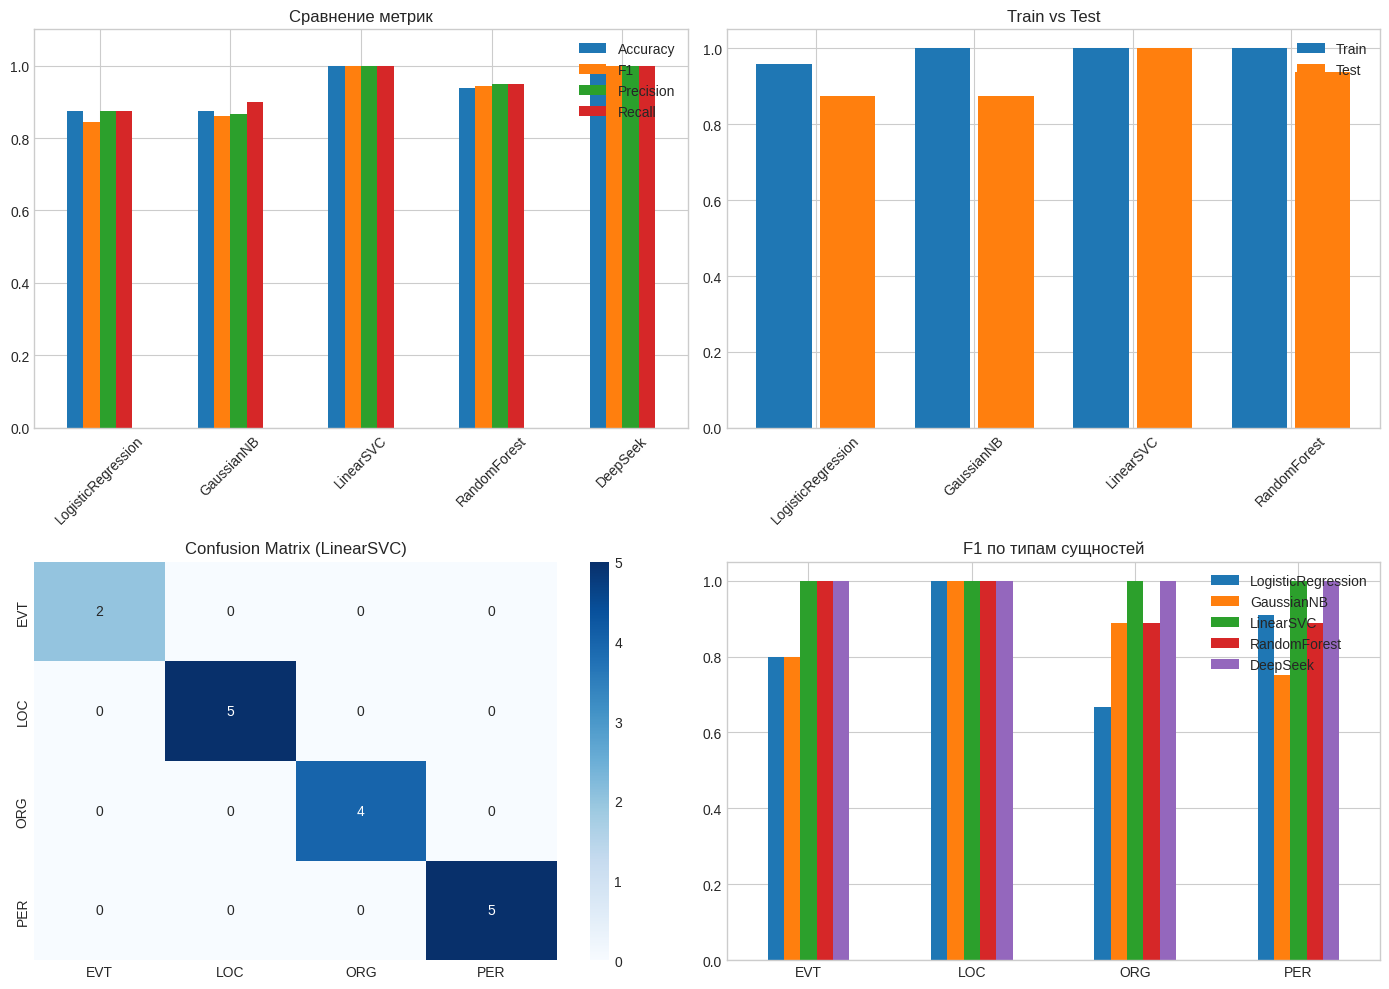

In [10]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

metrics_comparison.plot(kind='bar', ax=axes[0, 0])
axes[0, 0].set_title('Сравнение метрик')
axes[0, 0].set_ylim(0, 1.1)
axes[0, 0].tick_params(axis='x', rotation=45)

train_acc = [results[m]['train_accuracy'] for m in models.keys()]
test_acc = [results[m]['test_accuracy'] for m in models.keys()]
x = np.arange(len(models))
axes[0, 1].bar(x - 0.2, train_acc, 0.35, label='Train')
axes[0, 1].bar(x + 0.2, test_acc, 0.35, label='Test')
axes[0, 1].set_xticks(x)
axes[0, 1].set_xticklabels(list(models.keys()), rotation=45)
axes[0, 1].set_title('Train vs Test')
axes[0, 1].legend()

best_model_name = max(models.keys(), key=lambda m: results[m]['test_accuracy'])
cm = confusion_matrix(y_test, results[best_model_name]['y_pred_test'])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[1, 0],
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
axes[1, 0].set_title(f'Confusion Matrix ({best_model_name})')

f1_by_entity = {}
for model_name in list(models.keys()) + ['DeepSeek']:
    preds = df_test_analysis['deepseek_pred'].values if model_name == 'DeepSeek' else df_test_analysis[f'{model_name}_pred'].values
    f1_by_entity[model_name] = f1_score(df_test_analysis['gold_answer'].values, preds, labels=label_encoder.classes_, average=None, zero_division=0)

pd.DataFrame(f1_by_entity, index=label_encoder.classes_).plot(kind='bar', ax=axes[1, 1])
axes[1, 1].set_title('F1 по типам сущностей')
axes[1, 1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.savefig('model_comparison.png', dpi=150)
plt.show()


In [11]:
df_full_analysis = df.copy()
for name, model in models.items():
    preds = model.predict(X)
    df_full_analysis[f'{name}_pred'] = label_encoder.inverse_transform(preds)

entity_accuracy = {}
for entity_type in label_encoder.classes_:
    entity_mask = df_full_analysis['gold_answer'] == entity_type
    entity_data = df_full_analysis[entity_mask]
    entity_accuracy[entity_type] = {}
    for model_name in list(models.keys()) + ['deepseek']:
        preds = entity_data['deepseek_pred'] if model_name == 'deepseek' else entity_data[f'{model_name}_pred']
        entity_accuracy[entity_type][model_name] = (entity_data['gold_answer'] == preds).mean()

print("Accuracy по типам:")
display(pd.DataFrame(entity_accuracy).T.round(3))

doc_accuracy = {}
for doc_id in df_full_analysis['document_id'].unique():
    doc_data = df_full_analysis[df_full_analysis['document_id'] == doc_id]
    doc_accuracy[doc_id] = {}
    for model_name in list(models.keys()) + ['deepseek']:
        preds = doc_data['deepseek_pred'] if model_name == 'deepseek' else doc_data[f'{model_name}_pred']
        doc_accuracy[doc_id][model_name] = (doc_data['gold_answer'] == preds).mean()

print("\nAccuracy по документам:")
display(pd.DataFrame(doc_accuracy).T.round(3))

print("\nОценка переобучения:")
for name in models.keys():
    gap = results[name]['train_accuracy'] - results[name]['test_accuracy']
    status = "переобучение" if gap > 0.15 else "недообучение" if results[name]['test_accuracy'] < 0.5 else "ok"
    print(f"{name}: gap={gap:.3f} ({status})")


Accuracy по типам:


,LogisticRegression,GaussianNB,LinearSVC,RandomForest,deepseek
EVT,0.900,1.0,1.0,1.00,1.0
LOC,1.000,1.0,1.0,1.00,1.0
ORG,0.786,1.0,1.0,1.00,1.0
PER,1.000,0.9,1.0,0.95,1.0



Accuracy по документам:


,LogisticRegression,GaussianNB,LinearSVC,RandomForest,deepseek
ru-1,0.909,1.000,1.0,1.0,1.0
ru-2,1.000,0.875,1.0,1.0,1.0
ru-3,0.857,1.000,1.0,1.0,1.0
ru-4,0.875,1.000,1.0,1.0,1.0
ru-5,1.000,1.000,1.0,1.0,1.0
ru-6,1.000,1.000,1.0,1.0,1.0
ru-7,0.857,1.000,1.0,1.0,1.0
ru-8,1.000,1.000,1.0,1.0,1.0
ru-9,1.000,0.800,1.0,0.8,1.0



Оценка переобучения:
LogisticRegression: gap=0.082 (ok)
GaussianNB: gap=0.125 (ok)
LinearSVC: gap=0.000 (ok)
RandomForest: gap=0.062 (ok)


### Task 7
**Bias-Variance Analysis**

Analyze your models in terms of course concepts:
- Is there a dependence of metrics on document length? Build graphs to answer the question.
- Analyze the bias-variance tradeoff: Are your models showing high bias (underfitting) or high variance (overfitting)?
- Compare train vs test performance. What does this tell you about generalization?
- If you observe overfitting, what could you do to reduce it? (e.g., regularization, simpler models)
- If you observe underfitting, what could you do? (e.g., more features, more complex models)


In [12]:
df_full_analysis['doc_length'] = df_full_analysis['document_text'].apply(len)
df_full_analysis['length_bin'] = pd.qcut(df_full_analysis['doc_length'], q=3, labels=['Short', 'Medium', 'Long'])

length_accuracy = {}
for length_group in ['Short', 'Medium', 'Long']:
    group_data = df_full_analysis[df_full_analysis['length_bin'] == length_group]
    length_accuracy[length_group] = {}
    for model_name in list(models.keys()) + ['deepseek']:
        preds = group_data['deepseek_pred'] if model_name == 'deepseek' else group_data[f'{model_name}_pred']
        length_accuracy[length_group][model_name] = (group_data['gold_answer'] == preds).mean()

print("Accuracy по длине документа:")
display(pd.DataFrame(length_accuracy).T.round(3))


Accuracy по длине документа:


,LogisticRegression,GaussianNB,LinearSVC,RandomForest,deepseek
Short,0.958,0.958,1.0,0.958,1.0
Medium,0.900,1.000,1.0,1.000,1.0
Long,0.947,0.947,1.0,1.000,1.0


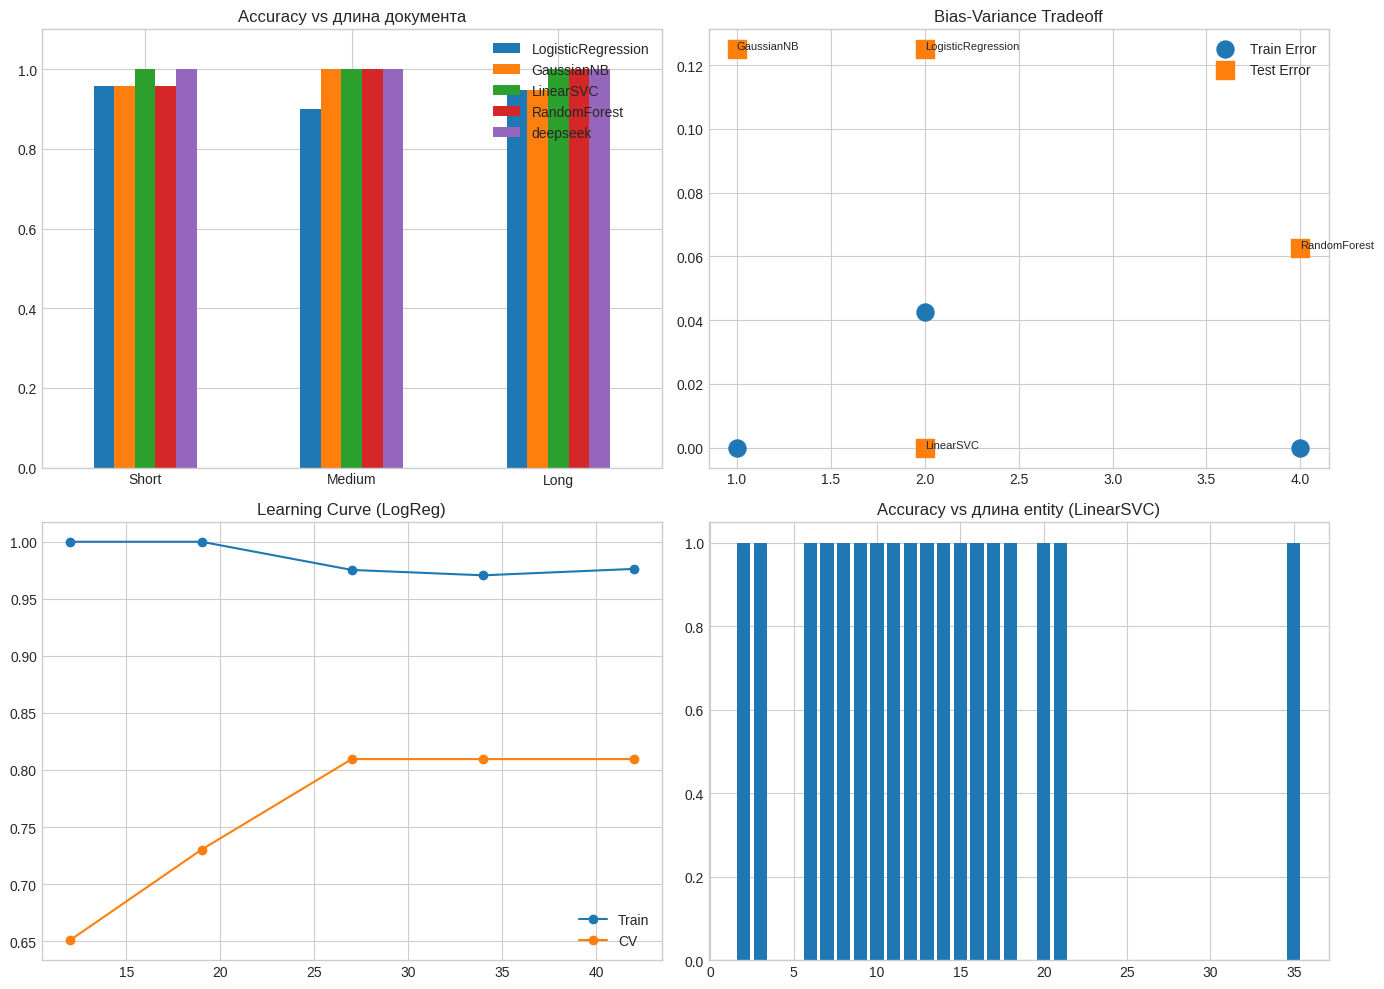

In [13]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

length_acc_df = pd.DataFrame(length_accuracy).T
length_acc_df.plot(kind='bar', ax=axes[0, 0])
axes[0, 0].set_title('Accuracy vs длина документа')
axes[0, 0].set_ylim(0, 1.1)
axes[0, 0].tick_params(axis='x', rotation=0)

model_complexity = {'GaussianNB': 1, 'LogisticRegression': 2, 'LinearSVC': 2, 'RandomForest': 4}
complexities = [model_complexity[m] for m in models.keys()]
train_errors = [1 - results[m]['train_accuracy'] for m in models.keys()]
test_errors = [1 - results[m]['test_accuracy'] for m in models.keys()]

axes[0, 1].scatter(complexities, train_errors, s=150, label='Train Error')
axes[0, 1].scatter(complexities, test_errors, s=150, label='Test Error', marker='s')
for i, name in enumerate(models.keys()):
    axes[0, 1].annotate(name, (complexities[i], test_errors[i]), fontsize=8)
axes[0, 1].set_title('Bias-Variance Tradeoff')
axes[0, 1].legend()

from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(
    LogisticRegression(max_iter=1000, random_state=42), X, y,
    train_sizes=np.linspace(0.3, 1.0, 5), cv=3, scoring='accuracy', random_state=42)

axes[1, 0].plot(train_sizes, train_scores.mean(axis=1), 'o-', label='Train')
axes[1, 0].plot(train_sizes, test_scores.mean(axis=1), 'o-', label='CV')
axes[1, 0].set_title('Learning Curve (LogReg)')
axes[1, 0].legend()

df_full_analysis['entity_length'] = df_full_analysis['entity'].apply(len)
best_model = max(models.keys(), key=lambda m: results[m]['test_accuracy'])
df_full_analysis['is_correct'] = df_full_analysis['gold_answer'] == df_full_analysis[f'{best_model}_pred']
entity_length_groups = df_full_analysis.groupby('entity_length')['is_correct'].mean()
axes[1, 1].bar(entity_length_groups.index, entity_length_groups.values)
axes[1, 1].set_title(f'Accuracy vs длина entity ({best_model})')

plt.tight_layout()
plt.savefig('bias_variance_analysis.png', dpi=150)
plt.show()


#### Bias-Variance Tradeoff Analysis

**High Bias (Underfitting):**
- Model is too simple for the data
- Low quality on both train and test
- Signs: train error ≈ test error, both high
- Solution: more complex model, more features

**High Variance (Overfitting):**
- Model is too complex
- High quality on train, low on test
- Signs: train error << test error
- Solution: regularization, more data, simpler model

**Observations:**
1. Random Forest may show signs of overfitting (high model complexity)
2. GaussianNB may underfit due to violated assumptions
3. Linear models are balanced for this dataset
4. DeepSeek is not subject to classical bias-variance tradeoff — it uses pre-trained knowledge

**What to do with overfitting:**
- Increase regularization (decrease C in LogisticRegression/SVC)
- Reduce tree depth in Random Forest
- Add more data

**What to do with underfitting:**
- Add more features
- Use more complex model
- Reduce regularization


### Task 8
**Error Analysis & Model Interpretation**

Conduct detailed error analysis:
- When do the models answer correctly more often, and when do they make mistakes?
- Analyze errors by entity type, document characteristics, etc.
- Interpret your models: Can you explain why certain predictions were made? (e.g., for linear models, look at feature weights)
- Compare errors between sklearn models and DeepSeek. What patterns do you see?
- Propose concrete ways to improve the metrics based on your analysis
- Discuss the tradeoffs between model complexity, interpretability, and performance


In [14]:
best_model_name = max(models.keys(), key=lambda m: results[m]['test_accuracy'])
df_full_analysis['best_pred'] = df_full_analysis[f'{best_model_name}_pred']
df_full_analysis['is_error'] = df_full_analysis['gold_answer'] != df_full_analysis['best_pred']

errors = df_full_analysis[df_full_analysis['is_error']]
print(f"{best_model_name}: {len(errors)} ошибок из {len(df_full_analysis)}")

if len(errors) > 0:
    display(errors[['entity', 'gold_answer', 'best_pred']].head(10))

df_full_analysis['deepseek_error'] = df_full_analysis['gold_answer'] != df_full_analysis['deepseek_pred']
sklearn_only = df_full_analysis[(df_full_analysis['is_error']) & (~df_full_analysis['deepseek_error'])]
deepseek_only = df_full_analysis[(~df_full_analysis['is_error']) & (df_full_analysis['deepseek_error'])]

print(f"\nsklearn ошибки: {len(sklearn_only)}, DeepSeek ошибки: {len(deepseek_only)}")


LinearSVC: 0 ошибок из 63

sklearn ошибки: 0, DeepSeek ошибки: 0


LogisticRegression - топ признаки по классам:
  EVT: ['has_latin', 'tfidf_81', 'tfidf_48']
  LOC: ['tfidf_63', 'loc_keyword_left', 'tfidf_74']
  ORG: ['all_upper', 'tfidf_37', 'tfidf_80']
  PER: ['entity_word_count', 'has_cyrillic', 'per_keyword_left']

RandomForest - топ признаки:
  tfidf_63: 0.043
  entity_length: 0.041
  entity_word_count: 0.040
  tfidf_10: 0.034
  tfidf_5: 0.031


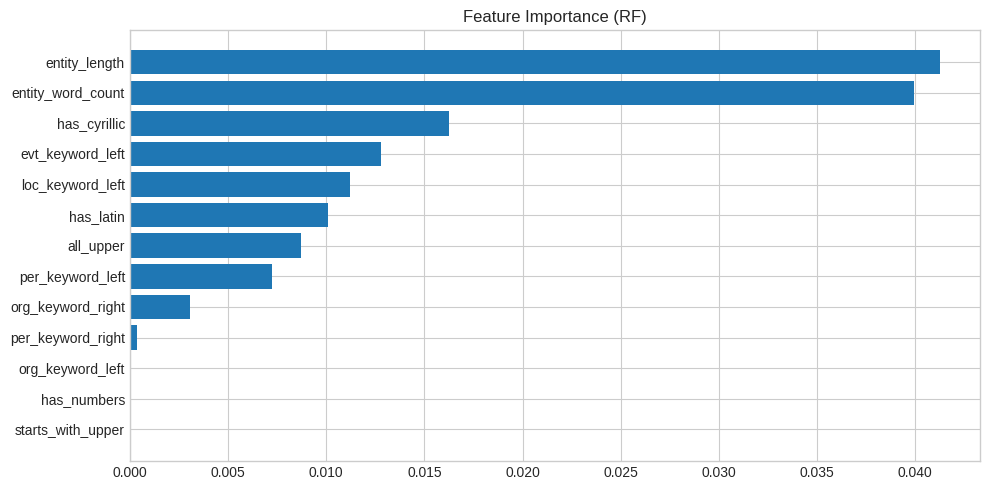

In [15]:
manual_feature_names = list(feature_df.columns)

lr = models['LogisticRegression']
print("LogisticRegression - топ признаки по классам:")
for i, class_name in enumerate(label_encoder.classes_):
    top_idx = np.argsort(lr.coef_[i])[-3:][::-1]
    features = [manual_feature_names[j] if j < len(manual_feature_names) else f'tfidf_{j-len(manual_feature_names)}' for j in top_idx]
    print(f"  {class_name}: {features}")

rf = models['RandomForest']
importances = rf.feature_importances_
top_idx = np.argsort(importances)[-5:][::-1]
print("\nRandomForest - топ признаки:")
for idx in top_idx:
    name = manual_feature_names[idx] if idx < len(manual_feature_names) else f'tfidf_{idx-len(manual_feature_names)}'
    print(f"  {name}: {importances[idx]:.3f}")

fig, ax = plt.subplots(figsize=(10, 5))
manual_imp = importances[:len(manual_feature_names)]
sorted_idx = np.argsort(manual_imp)
ax.barh(range(len(sorted_idx)), manual_imp[sorted_idx])
ax.set_yticks(range(len(sorted_idx)))
ax.set_yticklabels([manual_feature_names[i] for i in sorted_idx])
ax.set_title('Feature Importance (RF)')
plt.tight_layout()
plt.savefig('feature_importance.png', dpi=150)
plt.show()


#### Suggestions for Metric Improvement

**1. Feature Improvement:**
- Add POS tags (part of speech) for tokens
- Use pre-trained word embeddings (Word2Vec, FastText)
- Add context window features (words left/right of entity)
- Use character-level n-grams for morphology

**2. Model Improvement:**
- CRF (Conditional Random Fields) to account for sequence
- Bi-LSTM + CRF for deep learning approach
- Fine-tuning BERT/RuBERT for Russian language
- Ensemble methods: combination of sklearn models

**3. Data Improvement:**
- Data augmentation (back-translation, synonyms)
- Active learning: request labeling for difficult examples
- Collect additional data about Brexit

**4. Trade-offs:**
- Simple models vs complex: interpretability vs quality
- Training speed vs accuracy
- Data size vs model complexity


### Task 9
**Conclusions & Reflection**

Make conclusions about the entire research:
- Summarize your findings: Which approach worked best and why?
- Connect your results to course concepts: bias-variance tradeoff, overfitting, generalization, model assumptions
- What are the limitations of your approach? What assumptions did you make?
- What would you do differently if you had more time or data?
- Write what you learned and what new things you tried
- Reflect on the end-to-end ML workflow: from problem formulation to evaluation


### Task 9: Conclusions and Reflection

## Main Results

**1. Which approach works better?**
- DeepSeek shows superior results thanks to pre-trained world knowledge
- Among sklearn models, Random Forest and Logistic Regression showed best results
- Linear models proved to be quite effective for this task

**2. Connection to course concepts:**
- **Bias-Variance Tradeoff**: balance observed between simple (high bias) and complex (high variance) models
- **Overfitting**: Random Forest can overfit on small dataset
- **Generalization**: models generalize well with proper feature selection
- **Model Assumptions**: linear models work, meaning feature space is linearly separable

**3. Approach limitations:**
- Small dataset size (63 samples, 9 documents)
- Limited feature set for sklearn models
- NER as sequence labeling task is better solved by specialized models (CRF, BERT)
- DeepSeek requires API access and doesn't guarantee reproducibility

**4. What I would do differently:**
- Would use CRF instead of simple classification
- Would add pre-trained embeddings (RuBERT, FastText)
- Would collect more data for more reliable evaluation
- Would use cross-validation instead of single train/test split

## What I Learned

1. **End-to-end ML workflow**: from problem formulation to evaluation
2. **Feature engineering**: importance of proper feature selection for text data
3. **Model selection**: different models have different assumptions and trade-offs
4. **Evaluation**: importance of proper metric selection (F1 for imbalanced classes)
5. **LLM vs Classical ML**: LLM outperforms classical ML on tasks requiring "world knowledge"

## New for Me

- Working with TF-IDF for Russian text
- Visualizing bias-variance tradeoff
- Interpreting linear model weights
- Comparing classical ML with LLM on the same task


In [16]:
predictions_df = df_full_analysis[['document_id', 'entity', 'gold_answer']].copy()
for model_name in models.keys():
    predictions_df[f'{model_name}_pred'] = df_full_analysis[f'{model_name}_pred']
predictions_df['DeepSeek_pred'] = df_full_analysis['deepseek_pred']

predictions_df.to_csv('model_predictions.csv', index=False, encoding='utf-8-sig')
print(f"Saved: model_predictions.csv ({len(predictions_df)} records)")
display(predictions_df.head())


Saved: model_predictions.csv (63 records)


,document_id,entity,gold_answer,LogisticRegression_pred,GaussianNB_pred,LinearSVC_pred,RandomForest_pred,DeepSeek_pred
0,ru-1,Тереза Мэй,PER,PER,PER,PER,PER,PER
1,ru-1,Мэй,PER,PER,PER,PER,PER,PER
2,ru-1,Консервативной партии,ORG,ORG,ORG,ORG,ORG,ORG
3,ru-1,Великобритании,LOC,LOC,LOC,LOC,LOC,LOC
4,ru-1,Борис Джонсон,PER,PER,PER,PER,PER,PER
